# Gradient Boosting 

# https://www.geeksforgeeks.org/ml-gradient-boosting/

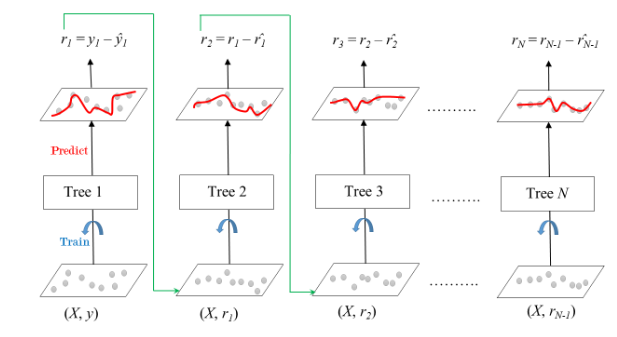

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [20]:
# Create a dictionary containing the data
data = {
    'Years of Exp': [1, 1.5, 2.5, 3, 5, 6],
    'Gap': [0, 1, 1, 0, 0, 0],
    'Annual salary': [4, 4, 5.5, 7, 7.5, 8]
}
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

X=df.drop('Annual salary',axis=1)
Y=df["Annual salary"]



Updated -predicted Values: [4.2028407  4.2028407  5.51787875 6.97428655 7.40889824 7.69325506]

In [21]:
# Step -1
# Create a decision tree regressor with a maximum depth of 1

#method-1
predicted_values = np.full_like(Y, np.mean(Y))
print("base -predicted:", predicted_values)


#method-2
error_values = np.array(Y - predicted_values)
print("base-errors",error_values)

base -predicted: [6. 6. 6. 6. 6. 6.]
base-errors [-2.  -2.  -0.5  1.   1.5  2. ]


In [22]:
updated_values = predicted_values
for i in range(30):
    error = error_values
    tree_reg = DecisionTreeRegressor(max_depth=1)
    tree_reg.fit(X, error)

    # Find the average target value in each leaf node
    # Leaf nodes can be found using the tree's `apply` method
    leaf_nodes = tree_reg.apply(X)

    leaf_values = {}
    for node in set(leaf_nodes):
        leaf_values[node] = error_values[leaf_nodes == node].mean()

    # Create a target column based on the average target value of the leaf node
    target_column = np.array([leaf_values[node] for node in leaf_nodes])

    # Print the target column
    print("Predicted column based on leaf node averages:")
    print(target_column)
    predicted_column=target_column
    
    updated_values=updated_values+0.1*(predicted_column)
    print("Updated -predicted Values:", updated_values)
    error_values = np.array(Y - updated_values)
    
    print("errors",error_values)
    print("=============================================")

# test set RMSE
rmse = mean_squared_error(Y, updated_values) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(rmse))

Predicted column based on leaf node averages:
[-1.5 -1.5 -1.5  1.5  1.5  1.5]
Updated -predicted Values: [5.85 5.85 5.85 6.15 6.15 6.15]
errors [-1.85 -1.85 -0.35  0.85  1.35  1.85]
Predicted column based on leaf node averages:
[-1.35 -1.35 -1.35  1.35  1.35  1.35]
Updated -predicted Values: [5.715 5.715 5.715 6.285 6.285 6.285]
errors [-1.715 -1.715 -0.215  0.715  1.215  1.715]
Predicted column based on leaf node averages:
[-1.215 -1.215 -1.215  1.215  1.215  1.215]
Updated -predicted Values: [5.5935 5.5935 5.5935 6.4065 6.4065 6.4065]
errors [-1.5935 -1.5935 -0.0935  0.5935  1.0935  1.5935]
Predicted column based on leaf node averages:
[-1.5935  -1.5935   0.79675  0.79675  0.79675  0.79675]
Updated -predicted Values: [5.43415  5.43415  5.673175 6.486175 6.486175 6.486175]
errors [-1.43415  -1.43415  -0.173175  0.513825  1.013825  1.513825]
Predicted column based on leaf node averages:
[-1.43415  -1.43415   0.717075  0.717075  0.717075  0.717075]
Updated -predicted Values: [5.290735  

In [23]:
# Create and fit the gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(loss='absolute_error',n_estimators=30)
gb_regressor.fit(X, Y)

# Predict on the test set
Y_pred = gb_regressor.predict(X)

print(Y_pred)
# Calculate Mean Squared Error (MSE)
rmse = mean_squared_error(Y, Y_pred) ** (1 / 2)
print("Root Mean Squared Error:", rmse)

[4.09538011 4.09538011 5.49022369 7.00072272 7.23500222 7.23500222]
Root Mean Squared Error: 0.33509607056228347


[4.2028407  4.2028407  5.51787875 6.97428655 7.40889824 7.69325506] === ours

[4.09538011 4.09538011 5.49022369 7.00072272 7.23500222 7.23500222] == predefined model

[4,          4,        5.5,       7,         7.5,       8         ] === actaul

In [37]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_estimators = 10
learning_rate = 0.1
estimators = []
estimator_weights = []

def My_GradientBoostingClassifier(X, y):
    # Initialize the prediction with the average value of y
    prediction = np.full(y.shape, np.mean(y))

    for _ in range(n_estimators):
        # Compute the residuals
        residuals = y - prediction

        # Compute the negative gradient (residuals)
        negative_gradient = y - 1 / (1 + np.exp(-prediction))

        # Fit a decision tree classifier to the negative gradient
        tree = DecisionTreeClassifier(max_depth=1)
        tree.fit(X, negative_gradient)

        # Update the prediction using the current tree
        update = learning_rate * tree.predict(X)
        prediction += update

        # Save the current tree and its weight
        estimators.append(tree)
        estimator_weights.append(learning_rate)

def predict_classifier(X):
    # Initialize predictions with zeros
    predictions = np.zeros(X.shape[0])

        # Make predictions with each tree
    for tree, weight in zip(estimators, estimator_weights):
        predictions += weight * tree.predict(X)

    # Apply sign function to convert predictions to class labels
    return np.sign(predictions)




In [38]:
# Create a list of lists containing the data
data = {
    "Gender": [1, 1, 0, 0, 1],
    "Age": [41, 54, 42, 40, 46],
    "Income":[40000, 30000, 25000, 60000, 50000],
    "Illness":["Yes", "No", "No", "Yes", "No"]
}
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
df["Illness"] = label_encoder.fit_transform(df["Illness"])

X=df.drop('Illness',axis=1)
Y=df["Illness"]
print(Y)

My_GradientBoostingClassifier(X,Y)

# Make predictions on the testing set
y_pred = predict_classifier(X)

# Calculate the accuracy
accuracy = accuracy_score(Y, y_pred)
print("Accuracy:", accuracy)

print("Y Predicted")
print(y_pred)
print("Y Actual")
print(list(Y))

0    1
1    0
2    0
3    1
4    0
Name: Illness, dtype: int32


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [42]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a list of lists containing the data
data = {
    "Gender": [1, 1, 0, 0, 1],
    "Age": [41, 54, 42, 40, 46],
    "Income": [40000, 30000, 25000, 60000, 50000],
    "Illness": [1, 0, 0, 1, 1]
}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Illness', axis=1)
y = df['Illness']

# Initialize and fit the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X, y)

# Make predictions
y_pred = gb_classifier.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

print(y_pred)
print(list(Y))

Accuracy: 1.0
[1 0 0 1 1]
[1, 0, 0, 1, 0]
